# DS 542 - Notebook 8 - Loss Functions and Gradient Descent

The goal of this homework is to improve your intuition about the basic process of gradient descent in the more easily visualized two parameter case.

This notebook uses the Gabor function example from the book, and asks you to do the following.
1. Implement the loss function to optimize.
2. Identify the minimum parameter values via brute force (grid search).
3. Illustrate the paths taken by gradient descent by annotating the loss countour map.


In [37]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch

In [38]:
# Gabor example data from https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap06/6_3_Stochastic_Gradient_Descent.ipynb

data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])
data.shape

(2, 30)

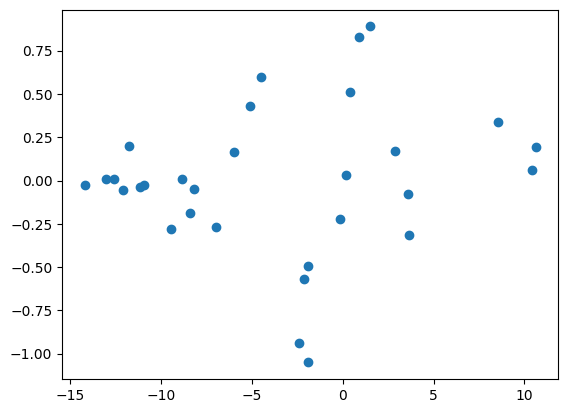

In [39]:
# confirm that first row is X data, second row is y data
data_X = data[0]
data_Y = data[1]
plt.scatter(data_X, data_Y)

None

In [40]:
# Gabor formula from 6.1.2 in Understanding Deep Learning

def gabor(x, phi):
    x = torch.tensor(x)
    return torch.sin(phi[0] + 0.06 * phi[1] * x) * torch.exp(-(phi[0] + 0.06 * phi[1] * x)**2 / 32.0)

In [41]:
# ground truth according to Figure 6.3.
phi_truth = np.array([0.0, 16.6])

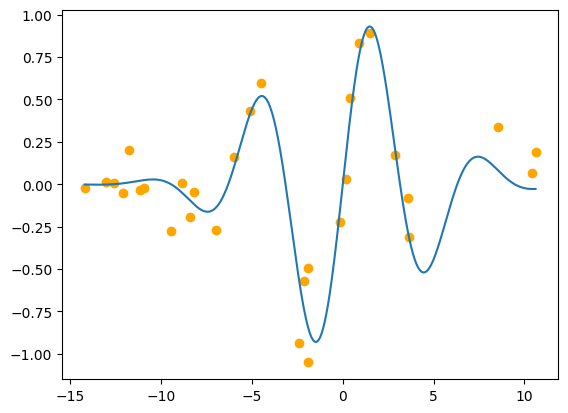

In [42]:
xs = np.linspace(data_X.min(), data_X.max(), 1000)

plt.plot(xs, gabor(xs, phi_truth), label="truth")
plt.scatter(data_X, data_Y, label="noisy samples", color="orange")

None

In [43]:
gabor(data_X, (0, 10))

tensor([-0.8765, -0.0801,  0.7604, -0.8803, -0.9290, -0.0654,  0.3402,  0.7262,
         0.2983,  0.5018,  0.7067,  0.4966, -0.0747,  0.2415,  0.2069, -0.3998,
         0.0249, -0.1035, -0.0128, -0.1603,  0.0943, -0.1476, -0.9128, -0.1596,
        -0.1021,  0.8964,  0.4564, -0.1488,  0.4296, -0.3380],
       dtype=torch.float64)

Implement the loss function taking in the parameter values as a tuple, and returning the sum of squared errors over all the training data points.

In [44]:
def loss(phi):
    # YOUR CHANGES HERE
    return 0

In [45]:
# parameter ranges from Figure 6.5 of Understanding Deep Learning

phi_0_choices = torch.linspace(-10, 10, 100)
phi_1_choices = torch.linspace(2.5, 22.5, 100)

Z range = [0.00,0.00]


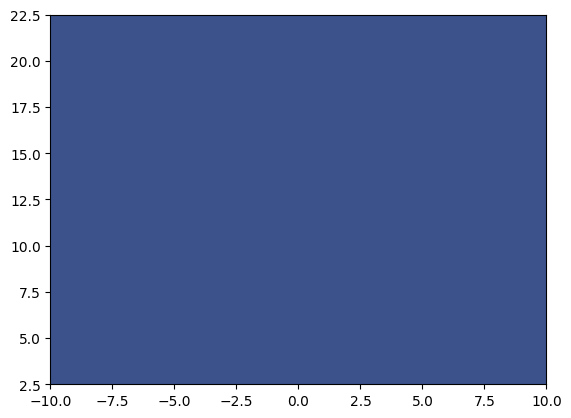

In [46]:
# prepare loss heat map
#
# X = phi_0
# Y = phi_1
# Z = loss((phi_0, phi_1))

(X, Y) = torch.meshgrid(phi_0_choices, phi_1_choices, indexing="ij")
Z = torch.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = loss((X[i,j], Y[i,j]))

plt.contourf(X, Y, Z)

print(f"Z range = [{Z.min():.2f},{Z.max():.2f}]")

The previous contour map shows the loss function over the same range of parameters as Figures 6.4 and 6.5 in the book.
With these colors, dark blue is the lowest loss, and yellow is the highest loss.
Set `phi_min` below to the parameter values yielding the lowest loss above.

In [47]:
# YOUR ANSWER HERE

phi_min = (0, 0)

Was your `phi_min` close to the ground truth from the book?

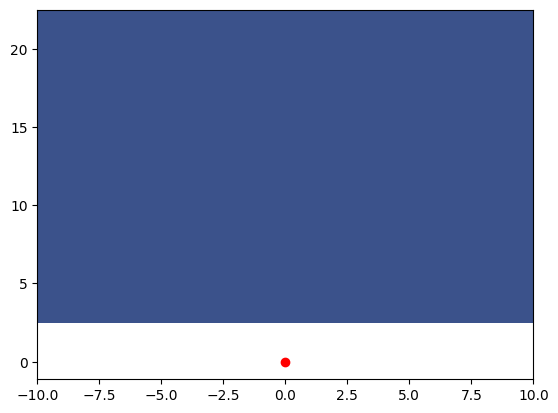

In [48]:
plt.contourf(X, Y, Z)

plt.scatter(*phi_min, color="red")

None

Here is the function that you identified as the best fit.

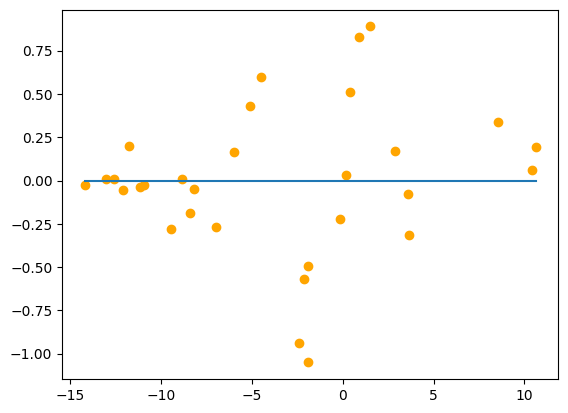

In [49]:
xs = np.linspace(data_X.min(), data_X.max(), 1000)

plt.plot(xs, gabor(xs, phi_min), label="fitted function")
plt.scatter(data_X, data_Y, label="noisy samples", color="orange")

None

Repeat the contour map again.
For each set of integer parameter values (e.g. phi=(3,4) or phi=(2,15)), add an arrow showing the parameter update of gradient descent using learning rate $\alpha=0.1$.

You can try computing the partial derivatives by hand, or using PyTorch to evaluate them via [torch.Tensor.backward](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) and [torch.Tensor.grad](https://pytorch.org/docs/stable/generated/torch.Tensor.grad.html).

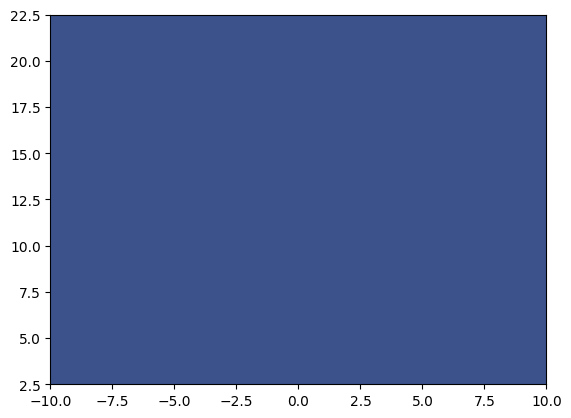

In [50]:
plt.contourf(X, Y, Z)

alpha = 0.1

for phi_0 in range(int(math.ceil(phi_0_choices.min())),
                   int(math.floor(phi_0_choices.max())) + 1):
    for phi_1 in range(int(math.ceil(phi_1_choices.min())),
                       int(math.floor(phi_1_choices.max())) + 1):
        # YOUR CHANGE HERE
        # plt.arrow(phi_0, phi_1, ...)
        pass